In [1]:
import numpy as np
import matplotlib.pyplot as plt
import labellines
import pickle
import time, timeit

import matplotlib
matplotlib.rcParams.update({'xtick.labelsize':20,
                            'ytick.labelsize':20,
                            'axes.titlesize':20,
                            'axes.labelsize':20,
                            'font.size':20,
                            'xtick.top':True,
                            'xtick.minor.visible':True,
                            'ytick.minor.visible':True,
                            'xtick.major.size':6,
                            'xtick.minor.size':4,
                            'ytick.right':True,
                            'xtick.direction':'in',
                            'ytick.direction':'in',
                            'font.family':'serif'})

In [2]:
class Fourier:
    #Initialize with some signal and time parameters
    def __init__(self, signal, times = None, dt = None): 
        self.signal = signal
        self.N = len(self.signal)
        
        #Specify times, or generate array
        self.times = times
        notime = False
        if self.times is None:
            notime = True
            self.times = np.arange(self.N)
            
        #Specify a timestep, or generate from times array
        self.dt = dt
        if self.dt is None:
            self.dt = self.times[1]-self.times[0]
        if notime:
            self.times = self.times * self.dt
            #Correct times to be consistent with timesteps if needed
    
    #Quick implementation of the DFT
    def dft(self, y = None):
        if y is not None:
            N = len(y)
        else:
            N = self.N
            y = self.signal
            
        nms = np.arange(N)
        mat = np.exp(2j * np.pi *  np.outer(nms, nms) / N)
        mat = mat * y
        ft = np.sum(mat, axis = 1)
        return ft
    
    def fft(self, y = None):
        #This function can be called to start iteration, and is also called 
        #as a recursion
        
        #If no y supplied, it starts from the class instance's signal
        if y is None:
            y = self.signal
            M = np.int(2**np.ceil(np.log10(self.N)/np.log10(2)))
            #Generate a size that is a power of two and zero pad
            y = np.append(y, np.zeros(M - self.N))
            
    
        M = int(len(y))
        
        #size of 2 is the miminum before you calculate the rest with DFT
        if M <= 2: 
            return self.dft(y = y)
        else:
            s = int(M / 2)
            #Separate into even and odd, passes them back into this function to loop!
            even = self.fft(y = y[::2])
            odd = self.fft(y = y[1::2])
            
            #Calculate omega based on the size of the current y
            omega = np.exp(2j * np.pi * np.arange(M) / M)

            #Concatenates the two halves
            #this is exactly the same for both halves except for omega values
            ft = np.concatenate([even + omega[:s] * odd, even + omega[s: 2 * s] * odd])
            ft = ft[:self.N]
            return ft

    def frequency(self, recenter = False):
        #Calculates frequencies as nu_n = n / (N * dt)
        self.freqs = np.arange(self.N) / (self.N * self.dt)
        if self.N % 2 == 0:
            #Recenters the frequencies such that 1/2 are positive and 1/2 are negative
            self.freqs_c = np.concatenate([self.freqs[:int(self.N/2)], -self.freqs[int(self.N/2):0:-1]])
        else:
            self.freqs_c = np.concatenate([self.freqs[:int(self.N/2)+1], -self.freqs[int(self.N/2):0:-1]])
        if recenter:
            return self.freqs_c
        else:
            return self.freqs

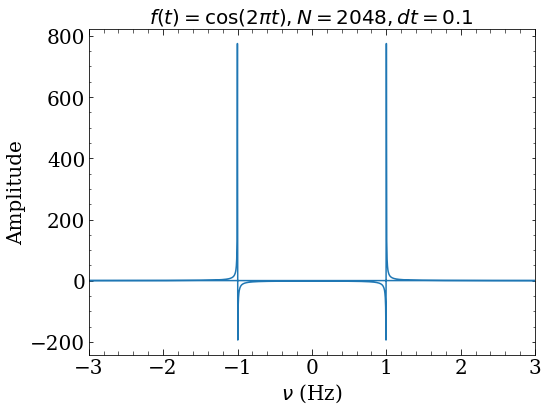

In [3]:
t = np.arange(0, 20000, .1)[:2048]
y = np.cos(2 * np.pi * t)
f1 = Fourier(y,  times = t)
f1.fft()
f1.frequency()

fig, ax = plt.subplots(1,1,figsize = (8,6))
ax.plot(f1.freqs_c, f1.fft().real)
# ax.plot(f.freqs_c, np.fft.fft(y).real)
ax.set_xlim(-3,3)
ax.set_xlabel(r'$\nu$ (Hz)')
ax.set_ylabel('Amplitude')
ax.set_title(r'$f(t) = \cos(2\pi t), N = 2048, dt = 0.1$')
# plt.savefig('fft_2piCos_dt5.png', overwrite = True)
plt.show()
# plt.plot(f.frequency(recenter = True), np.fft.fft(np.sin(np.arange(1024))).real)

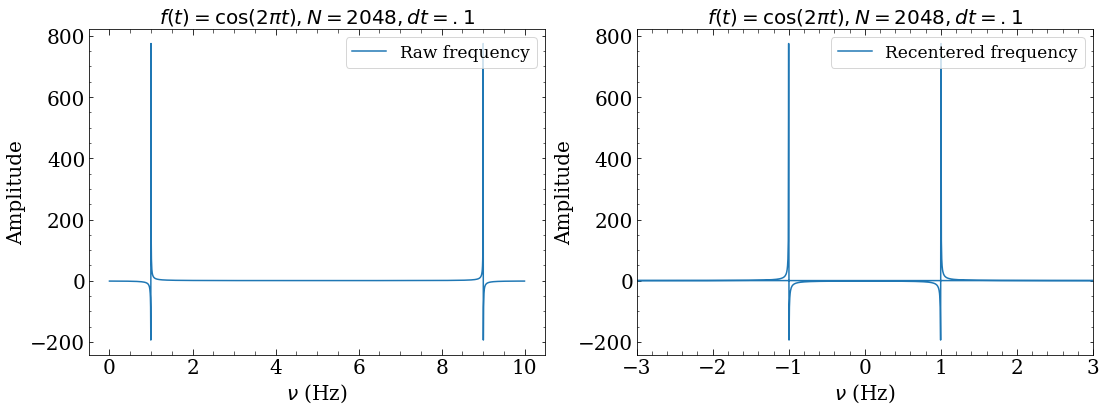

In [4]:
t = np.arange(0, 2000, .1)[:2048]
y = np.cos(2 * np.pi * t)
f = Fourier(y, times = t)
f.fft()
f.frequency()

fig, (ax1,ax2) = plt.subplots(1,2,figsize = (18,6))
ax1.plot(f.freqs, f.fft().real, label = 'Raw frequency')
# ax1.plot(f.freqs_c, f.fft_r().real)

# ax1.set_xlim(-3,3)
ax1.set_xlabel(r'$\nu$ (Hz)')
ax1.set_ylabel('Amplitude')
ax1.set_title(r'$f(t) = \cos(2\pi t), N = 2048, dt = .1$')
ax1.legend(fontsize = 17, loc = 'upper right')

ax2.plot(f1.freqs_c, f1.fft().real, label = 'Recentered frequency')
# ax2.plot(f.freqs_c, f.fft_r().real)
ax2.set_xlim(-3,3)
ax2.set_xlabel(r'$\nu$ (Hz)')
ax2.set_ylabel('Amplitude')
ax2.set_title(r'$f(t) = \cos(2\pi t), N = 2048, dt = .1$')
ax2.legend(fontsize=17, loc = 'upper right')
# plt.savefig('fft_2piCos.png', overwrite = True)
# plt.savefig('fft_2piCos_funky.png', overwrite = True)

plt.show()

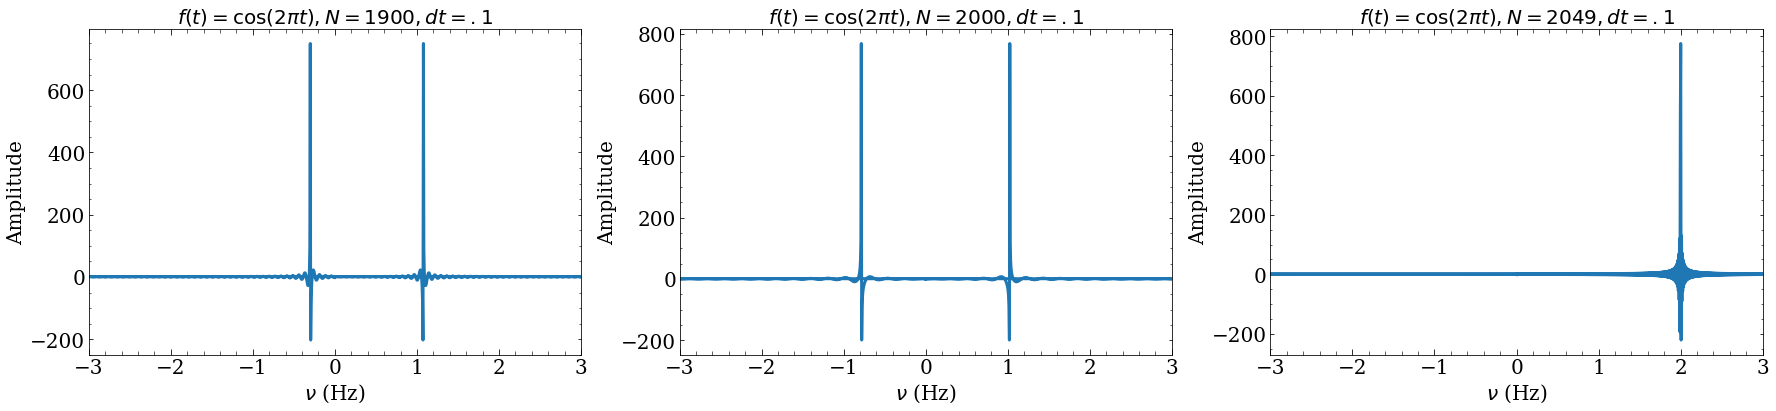

In [5]:
t_all = np.arange(0, 20000, .1)

fig, axs = plt.subplots(1,3,figsize = (30,6))

number = [1900, 2000, 2049]

for val in range(3):
    ax = axs[val]
    t = t_all[:number[val]]
    y = np.cos(2 * np.pi * t)
    f = Fourier(y, times = t)
    f.fft()
    f.frequency()
    ax.plot(f.freqs_c, f.fft().real, label = '', linewidth = 3)
    # ax1.plot(f.freqs_c, f.fft_r().real)

    ax.set_xlim(-3,3)
    ax.set_xlabel(r'$\nu$ (Hz)')
    ax.set_ylabel('Amplitude')
    ax.set_title(r'$f(t) = \cos(2 \pi t), N = {}, dt = .1$'.format(number[val]))
#     ax.legend(fontsize = 17, loc = 'upper right')

plt.savefig('varied_padding.png', overwrite = True)
plt.show()

66150 66150
66150


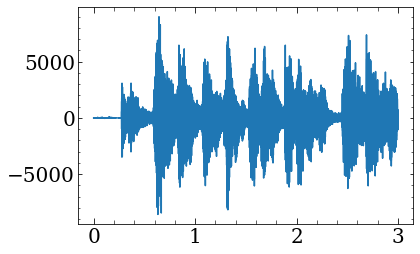

In [6]:
from scipy.io.wavfile import read
samplerate, data = read('CantinaBand3.wav')
time = np.arange(0, len(data)/samplerate, 1/samplerate)
print(len(data), len(time))
plt.plot(time, data)
data = np.array(data)
print(len(data))

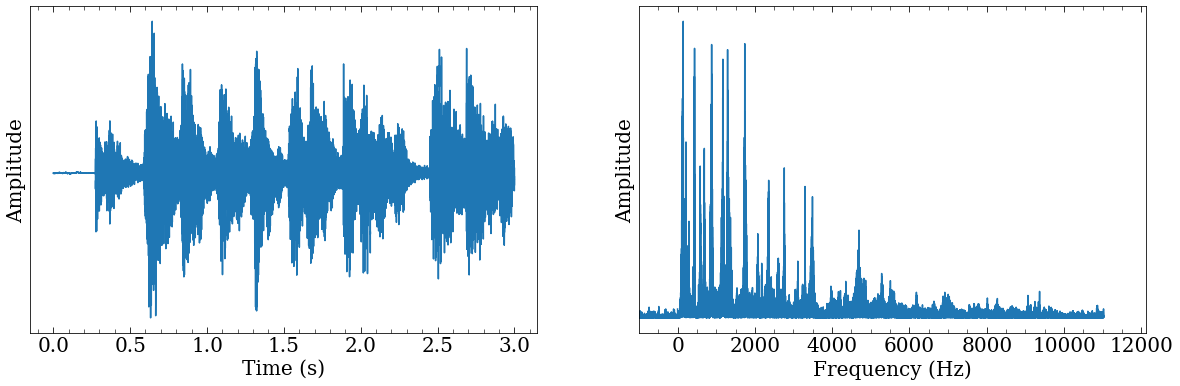

In [7]:
data_fourier = data[-66150:] #Downsample
starwars = Fourier(data_fourier, times = time[-66150:])
fig, (ax1, ax2) = plt.subplots(1,2, figsize =  (20,6))
ax1.plot(time, data)

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax1.set_yticks([])

amps = starwars.fft()
nu = starwars.frequency(recenter = True)

ax2.plot(starwars.freqs_c, np.abs(amps.real))
# ax2.plot(starwars.freqs_c, np.abs(np.fft.fft(data_fourier)))

ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Amplitude')
l, r = ax2.get_xlim()
ax2.set_xlim(-1000,r)
ax2.set_yticks([])

plt.savefig('cantina.png', overwrite = True)
plt.show()

In [8]:
len(data)
np.int(2**np.floor(np.log10(len(data))/np.log10(2)))
np.log10(65536)/np.log10(2)

16.0

In [33]:
def plotsounds(fname, size = None, end = None):
    s_rate, data_raw = read(fname + '.wav')
    print(len(data_raw))
    time_raw = np.arange(0, len(data_raw) / s_rate, 1 / s_rate)
    if size == None:
        size = np.int(2**np.floor(np.log10(len(data_raw))/np.log10(2)))#next LOWEST power of 2!
        print(size, len(data_raw))
    data, time = data_raw[:size], time_raw[:size]
    print(np.log10(size)/np.log10(2))
    
    fig, (ax1,ax2)= plt.subplots(1,2,figsize = (20,6))
    ax1.plot(time, data)
    ax1.set_yticks([])
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Amplitude')
    
    fourier = Fourier(data, times = time)
    nu = fourier.frequency(recenter = True)
    ax2.plot(nu, np.abs(fourier.fft().real))
    ax2.set_yticks([])
    l, r = ax2.get_xlim()
    ax2.set_xlim(-.05 * r, r)
    ax2.set_xlabel('Frequency (Hz)')
    ax2.set_ylabel('Amplitude')
    
    plt.savefig('fft_' + fname + '.png', overwrite = True)
    plt.show()

91240
91240 91240
16.4773788261995


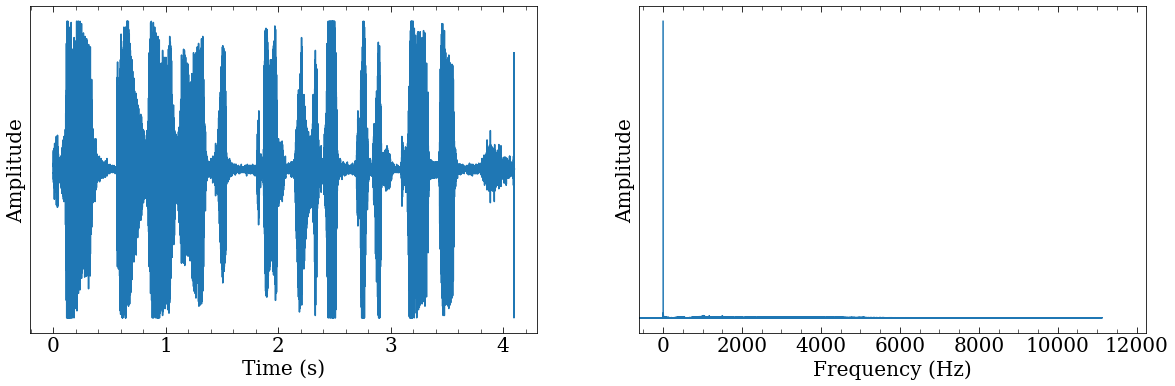

1323000
1323000 1323000
20.335381630940763


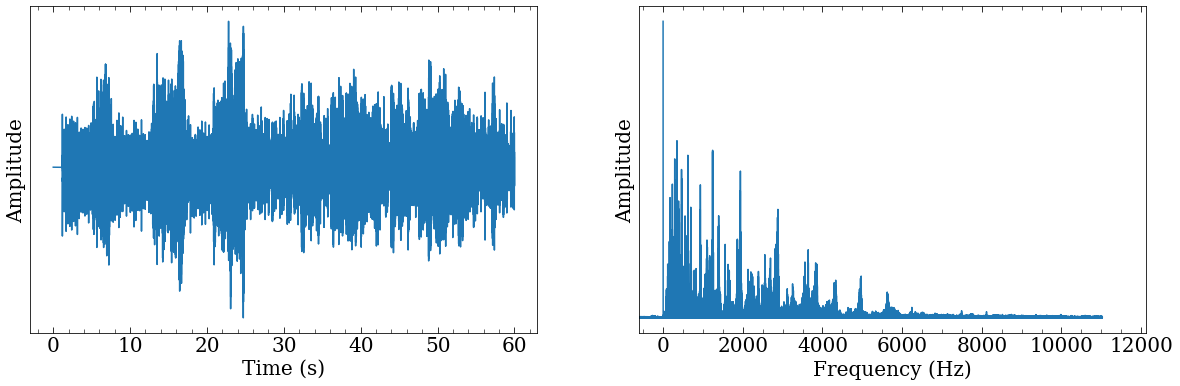

66150
66150 66150
16.0134535360534


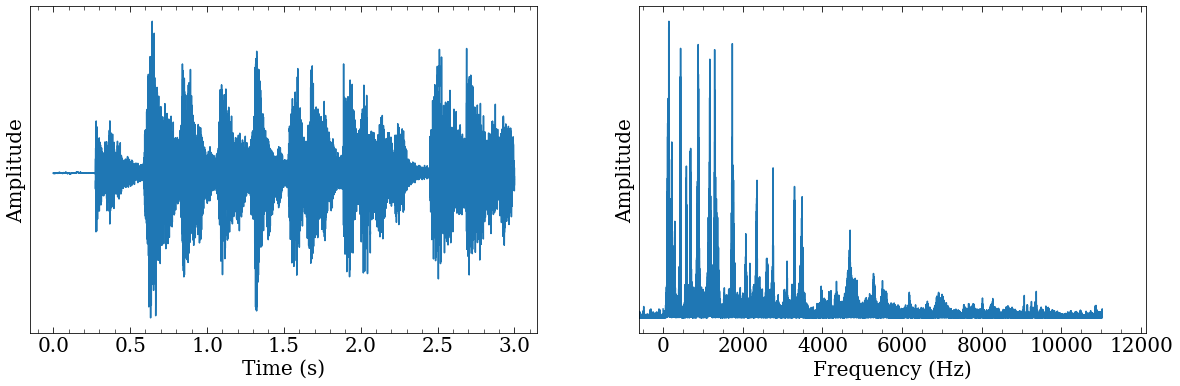

In [34]:
sounds = ['taunt', 'BabyElephantWalk60', 'CantinaBand3']
# sounds = ['CantinaBand3']
size = [None, None, None]
end = [None, None, None]
for i in range(3):
    plotsounds(sounds[i], size = size[i])